In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [63]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [64]:
df.shape

(3554, 18)

In [65]:
df.head(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [66]:
latlong = pd.read_csv('latlong.csv')

In [67]:
latlong

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"
...,...,...
124,sector 113,"28.5287° N, 77.0233° E"
125,sector 114,"28.5334° N, 77.0118° E"
126,sector 115,"28.5385° N, 77.0061° E"
127,gwal pahari,"28.4484° N, 77.0210° E"


In [68]:
latlong['latitude'] = latlong['coordinates'].str.split(',').str.get(0).str.split('°').str.get(0).astype('float')

In [69]:
latlong['longitude'] = latlong['coordinates'].str.split(',').str.get(1).str.split('°').str.get(0).astype('float')

In [70]:
latlong.head()

,sector,coordinates,latitude,longitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176


In [71]:
new_df = df.merge(latlong, on='sector')

In [72]:
new_df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'latitude', 'longitude'],
      dtype='object')

In [73]:
# Check for non-numeric values in specific columns
for col in ['price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']:
    non_numeric_values = new_df[~new_df[col].apply(lambda x: isinstance(x, (int, float)))][col].unique()
    print(f"Non-numeric values in column '{col}': {non_numeric_values}")

# Inspect rows where the error occurs
problematic_rows = new_df[new_df.apply(lambda row: any(isinstance(cell, str) for cell in row), axis=1)]
print(problematic_rows)


Non-numeric values in column 'price': []
Non-numeric values in column 'price_per_sqft': []
Non-numeric values in column 'built_up_area': []
Non-numeric values in column 'latitude': []
Non-numeric values in column 'longitude': []
     property_type                       society     sector  price  \
0             flat       signature global park 4  sector 36   0.82   
1             flat                avl 36 gurgaon  sector 36   0.75   
2             flat       signature global park 4  sector 36   1.00   
3             flat  krisumi waterfall residences  sector 36   4.10   
4             flat       signature global park 4  sector 36   0.72   
...            ...                           ...        ...    ...   
3324          flat             vatika xpressions  sector 88   1.10   
3325          flat             vatika xpressions  sector 88   0.92   
3326          flat             vatika xpressions  sector 88   0.92   
3327         house                   independent  sector 27   4.25   
3

In [74]:
import pandas as pd
import numpy as np

# Replace non-numeric values with NaN in the entire DataFrame
new_df_numeric = new_df.apply(pd.to_numeric, errors='coerce')

# Now, calculate the mean
group_df = new_df_numeric.groupby('sector').mean()[['price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']]



In [75]:
# Clean the 'balcony' column by removing non-numeric characters
new_df['balcony'] = new_df['balcony'].str.replace(r'\D', '', regex=True)

# Convert 'balcony' column to numeric, replacing non-numeric values with NaN
new_df['balcony'] = pd.to_numeric(new_df['balcony'], errors='coerce')

# Now, calculate the mean
group_df = new_df.groupby('sector').mean()[['price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']]



TypeError: Could not convert flatflatflatflatflatflatflatflatflatflatflatflatflatflatflatflatflatflat to numeric

In [ ]:

import pandas as pd

# Clean the 'balcony' column by extracting numeric parts
new_df['balcony'] = new_df['balcony'].str.extract(r'(\d+)')

# Convert 'balcony' column to numeric, replacing non-numeric values with NaN
new_df['balcony'] = pd.to_numeric(new_df['balcony'], errors='coerce')

# Now, calculate the mean
group_df = new_df.groupby('sector').mean()[['price', 'price_per_sqft', 'built_up_area', 'latitude', 'longitude']]


In [76]:
group_df

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,


In [77]:
fig = px.scatter_mapbox(group_df, lat="latitude", lon="longitude", color="price_per_sqft", size='built_up_area',
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",text=group_df.index)
fig.show()

In [78]:
new_df.to_csv('data_viz1.csv',index=False)

In [79]:
df1 = pd.read_csv('gurgaon_properties.csv')

In [80]:
df1.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,3 BHK Flat in Sector 36 Sohna,flat,signature global park 4,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,not available,"144, Sector 36 Sohna, Gurgaon, Haryana",2.0,NaN,0 to 1 Year Old,"['Sector 55-56 Metro Station', 'The Leaf Mall ...",We need to shift somewhere else,NaN,"['Lift(s)', 'Park']",NaN
1,2 BHK Flat in Sector 89 Gurgaon,flat,smart world gems,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,"study room,servant room","O 118d, Sector 89 Gurgaon, Gurgaon, Haryana",4.0,NaN,Within 6 months,"['Sant Soordas Sihi Metro Station', 'Airia Mal...",Smartworld gem4 th floor new construction,NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s...","['Environment4 out of 5', 'Lifestyle4 out of 5..."
2,2 BHK Flat in Sector 86 Gurgaon,flat,pyramid elite,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,not available,"Sector 86 Gurgaon, Gurgaon, Haryana",0.0,NaN,Under Construction,"['V3S Sapphire Ninety Mall', 'Sector 86 Road',...",Near to dwarka expressway\r\nNear to airport,[],"['Intercom Facility', 'Lift(s)', 'Park']","['Environment5 out of 5', 'Safety4.5 out of 5'..."
3,2 BHK Flat in Sohna,flat,breez global hill view,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,not available,"1701 & 1708, Sohna, Gurgaon, Haryana",17.0,NaN,0 to 1 Year Old,"['Huda City Centre', 'Omaxe City Centre', 'Nin...",Both adjacent properties available which can b...,[],"['Feng Shui / Vaastu Compliant', 'Security / F...","['Safety4 out of 5', 'Lifestyle4 out of 5', 'E..."
4,3 BHK Flat in Sector 92 Gurgaon,flat,bestech park view sanskruti,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,"servant room,others","Sector 92 Gurgaon, Gurgaon, Haryana",10.0,North-West,1 to 5 Year Old,"['Sapphire 93 Mall', 'Dwarka Expressway', 'NH-...",Check out this 3 bhk apartment for sale in bes...,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Centrally Air Conditioned', 'Water purifier'...","['Green Area5 out of 5', 'Construction5 out of..."


In [81]:
wordcloud_df = df1.merge(df, left_index=True, right_index=True)[['features','sector']]

In [82]:
wordcloud_df.head()

,features,sector
0,"['Lift(s)', 'Park']",sector 36
1,"['Power Back-up', 'Intercom Facility', 'Lift(s...",sector 89
2,"['Intercom Facility', 'Lift(s)', 'Park']",sohna road
3,"['Feng Shui / Vaastu Compliant', 'Security / F...",sector 92
4,"['Centrally Air Conditioned', 'Water purifier'...",sector 102


In [83]:
import ast
main = []
for item in wordcloud_df['features'].dropna().apply(ast.literal_eval):
    main.extend(item)

In [84]:
main

['Lift(s)',
 'Park',
 'Power Back-up',
 'Intercom Facility',
 'Lift(s)',
 'Swimming Pool',
 'Park',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Fitness Centre / GYM',
 'Club house / Community Center',
 'Intercom Facility',
 'Lift(s)',
 'Park',
 'Feng Shui / Vaastu Compliant',
 'Security / Fire Alarm',
 'Intercom Facility',
 'Lift(s)',
 'Maintenance Staff',
 'Water Storage',
 'Park',
 'Visitor Parking',
 'Centrally Air Conditioned',
 'Water purifier',
 'Security / Fire Alarm',
 'Feng Shui / Vaastu Compliant',
 'Private Garden / Terrace',
 'Intercom Facility',
 'Lift(s)',
 'High Ceiling Height',
 'Maintenance Staff',
 'False Ceiling Lighting',
 'Water Storage',
 'Separate entry for servant room',
 'No open drainage around',
 'Bank Attached Property',
 'Piped-gas',
 'Internet/wi-fi connectivity',
 'Recently Renovated',
 'Visitor Parking',
 'Swimming Pool',
 'Park',
 'Security Personnel',
 'Natural Light',
 'Airy Rooms',
 'Spacious Interiors',
 'Low Density Society',
 'Waste Disposal',

In [85]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [86]:
from wordcloud import WordCloud

In [87]:
feature_text = ' '.join(main)

In [88]:
import pickle
pickle.dump(feature_text, open('feature_text.pkl','wb'))

In [89]:
feature_text

'Lift(s) Park Power Back-up Intercom Facility Lift(s) Swimming Pool Park Piped-gas Internet/wi-fi connectivity Fitness Centre / GYM Club house / Community Center Intercom Facility Lift(s) Park Feng Shui / Vaastu Compliant Security / Fire Alarm Intercom Facility Lift(s) Maintenance Staff Water Storage Park Visitor Parking Centrally Air Conditioned Water purifier Security / Fire Alarm Feng Shui / Vaastu Compliant Private Garden / Terrace Intercom Facility Lift(s) High Ceiling Height Maintenance Staff False Ceiling Lighting Water Storage Separate entry for servant room No open drainage around Bank Attached Property Piped-gas Internet/wi-fi connectivity Recently Renovated Visitor Parking Swimming Pool Park Security Personnel Natural Light Airy Rooms Spacious Interiors Low Density Society Waste Disposal Rain Water Harvesting Water softening plant Shopping Centre Fitness Centre / GYM Club house / Community Center Centrally Air Conditioned Water purifier Security / Fire Alarm Feng Shui / Vaas

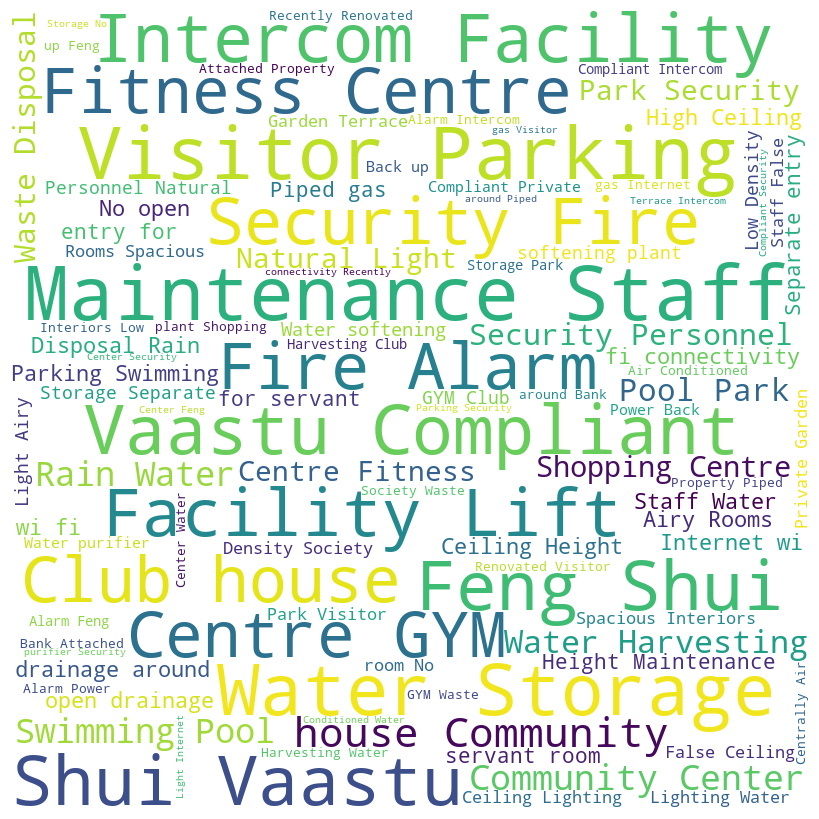

In [90]:
plt.rcParams["font.family"] = "Arial"

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = set(['s']),  # Any stopwords you'd like to exclude
                      min_font_size = 10).generate(feature_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() # st.pyplot()

In [91]:
data = dict(
    names=["A", "B", "C", "D", "E", "F"],
    parents=["", "", "", "A", "A", "C"],
    values=[10, 20, 30, 40, 50, 60],
)

fig = px.sunburst(
    df1,
    names='property_type',
    values='price_per_sqft',
    parents='bedRoom',
    title="Sample Sunburst Chart"
)
fig.show()

In [92]:
fig = px.scatter(df, x="built_up_area", y="price", color="bedRoom", title="Area Vs Price")

# Show the plot
fig.show()

In [93]:
fig = px.pie(df, names='bedRoom', title='Total Bill Amount by Day')

# Show the plot
fig.show()

In [94]:
temp_df = df[df['bedRoom'] <= 4]
# Create side-by-side boxplots of the total bill amounts by day
fig = px.box(temp_df, x='bedRoom', y='price', title='BHK Price Range')

# Show the plot
fig.show()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_9696\3761596323.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\KIIT\AppData\Local\Temp\ipykernel_9696\3761596323.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='price', ylabel='Density'>

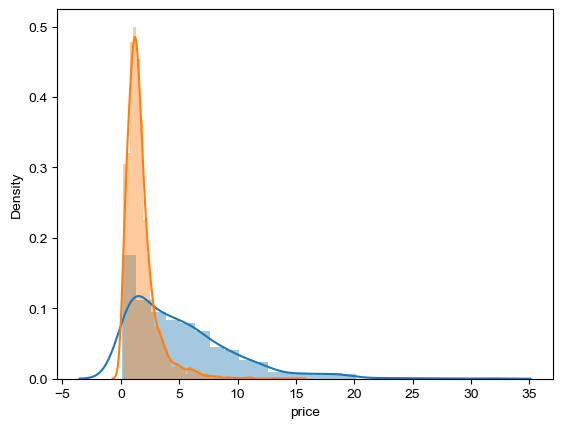

In [95]:
sns.distplot(df[df['property_type'] == 'house']['price'])
sns.distplot(df[df['property_type'] == 'flat']['price'])

In [96]:
new_df['sector'].unique().tolist().insert(0,'overall')